In [2]:
from raspberry_listener.datatypes import Sensor, SensorData, SensorReading, SensorType
from raspberry_listener.remotereader import download_archive
import polars as pl
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [3]:
archive = download_archive()

In [4]:
sensor_combinations = {"humidity": ["DHT11"], "temperature": ["DHT11","PI_CPU", "DS18B20"]}

In [5]:
df = pl.read_parquet(archive)

In [12]:
def histogram(df: pl.DataFrame, sensor_type, sensor):
    def get_timesorted_single_sensor_frame(df: pl.DataFrame) -> tuple[pl.DataFrame, str]:
        single_sensor_df = df.lazy().filter(pl.col("sensor_type").is_in([sensor_type]) & pl.col("sensor").is_in([sensor]))
        return single_sensor_df.collect(), df.item(row=0, column="unit")
    single_sensor_df, unit= get_timesorted_single_sensor_frame(df)
    plt.figure()
    readings = single_sensor_df.select(pl.col("reading"))
    plt.xticks(rotation=30)
    plt.hist(readings, density=True, orientation="horizontal")
    plt.ylabel(unit, rotation="horizontal", loc="top")
    plt.title(f"{sensor_type}, {sensor}")
    

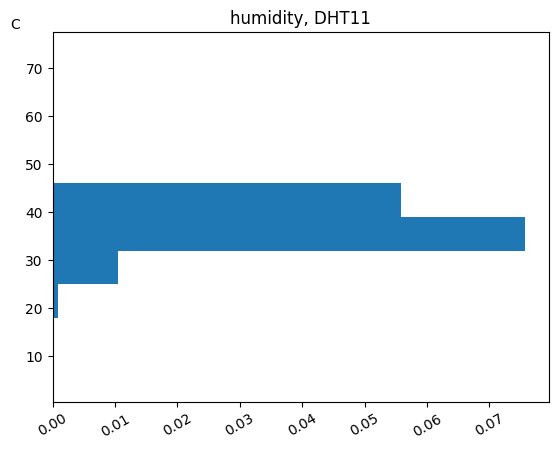

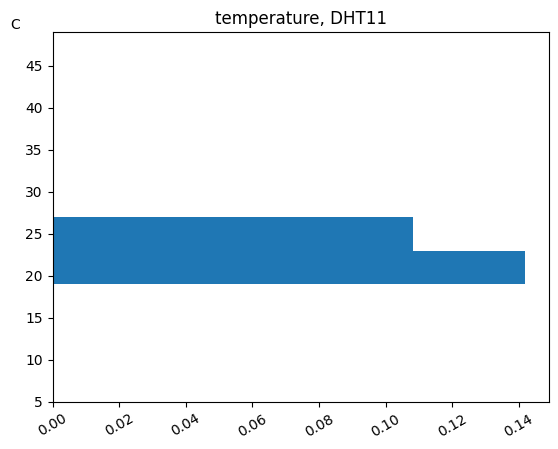

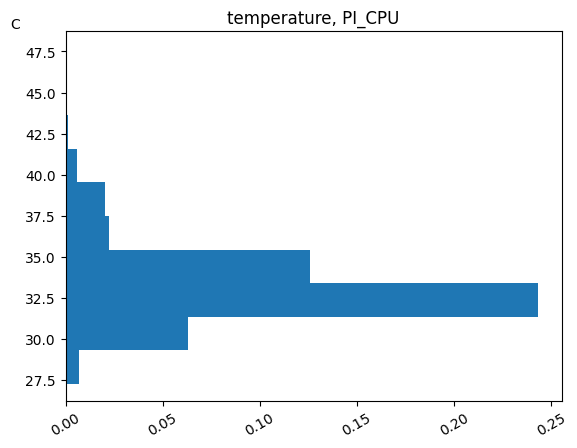

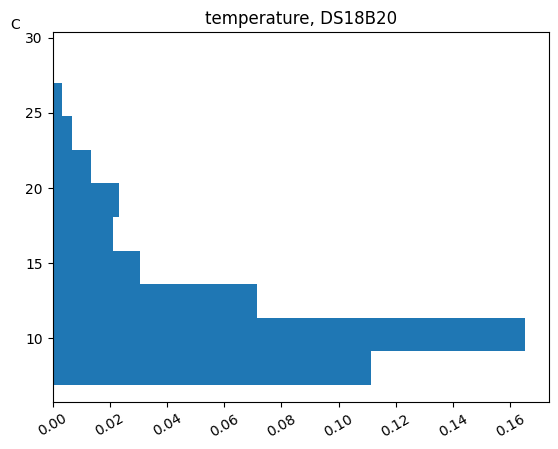

         245808 function calls (239484 primitive calls) in 0.328 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        8    0.178    0.022    0.178    0.022 {method 'collect' of 'builtins.PyLazyFrame' objects}
        4    0.013    0.003    0.021    0.005 histograms.py:678(histogram)
        4    0.008    0.002    0.008    0.002 {method 'to_numpy' of 'builtins.PyDataFrame' objects}
1460/1108    0.005    0.000    0.030    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
      744    0.004    0.000    0.004    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      988    0.003    0.000    0.015    0.000 artist.py:1180(_update_props)
10176/9112    0.003    0.000    0.005    0.000 artist.py:319(stale)
  2992/48    0.003    0.000    0.006    0.000 copy.py:128(deepcopy)
     7512    0.002    0.000    0.005    0.000 __init__.py:725(__getitem__)
     2168    0.002    0.000    0.003    0.000 __init__.p

In [16]:
def plot_all():
    for sensor_type, sensors in sensor_combinations.items():
        for sensor in sensors:
            histogram(df, sensor_type, sensor)
%prun plot_all()
